# Analysing Federal Election Data

This notebook contains some code snippets to demonstrate a number of features of [Jupyter][jupyter] notebook. We use the datasets from [Australian Electoral Commission](https://www.aec.gov.au) for this demonstration. The data can be obtained [here](https://www.aec.gov.au/Elections/Federal_Elections/Stats_CDRom.htm).

There are two objectives of this demonstration:

1. Show case some of the features of [Jupyter][jupyter] notebook and the overall concept of reproducibility. 
2. Show case some simple [Python][python] codes for generating data visualization.

[Python][python] is a general purpose language known for its simplicity. It is becoming quite popular with Data Scientists and along with [R][R], they form a great set of tools for data analytics and modelling. The power of both [Python][python] and [R][R] come from the vast collection of packages, libraries and modules which allows a wide range of analysis to be done. As they are open-source software, virtually all of these packages, libraries and modules are free to use. 

[Jupyter][jupyter] notebook is also an open source software. It aims to allow users to communicate ideas and code effectively. It provides a platform for documentation with code embedded in the document. This allows analysis to be reproduce **exactly** by anyone. It utilises the [markdown](https://en.wikipedia.org/wiki/Markdown) syntax which is very quick to learn. 

For purposes of this demonstration, we need a few additional modules. 

1. [matplotlib](http://www.matplotlib.org) - a plotting module.
2. [pandas](https://pandas.pydata.org) - a module for data manipulation. 
3. [numpy](http://www.numpy.org) - a module for handling arrays. 
3. [folium](https://python-visualization.github.io/folium/) - a module for generating map. 

[jupyter]: https://jupyter.org
[python]: http://www.python.org
[R]: http://www.r-project.org

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import folium as fol
import folium.plugins as folp

## General Election Trend

The following looks at the general election trend. The first line import the data and the second line shows the first 45 lines of the data. 

In [2]:
result = pd.read_csv('ElectionResults.csv',header=0)
result.head(45)

Unnamed: 0   No.               Date  \
0            0   1.0      29 March 1901   
1            1   2.0   16 December 1903   
2            2   3.0   12 December 1906   
3            3   4.0      13 April 1910   
4            4   5.0        31 May 1913   
5            5   6.0   5 September 1914   
6            6   7.0         5 May 1917   
7            7   8.0   13 December 1919   
8            8   9.0   16 December 1922   
9            9  10.0   14 November 1925   
10          10  11.0   17 November 1928   
11          11  12.0    12 October 1929   
12          12  13.0   19 December 1931   
13          13  14.0  15 September 1934   
14          14  15.0    23 October 1937   
15          15  16.0  21 September 1940   
16          16  17.0     21 August 1943   
17          17  18.0  28 September 1946   
18          18  19.0   10 December 1949   
19          19  20.0      28 April 1951   
20          20  21.0        29 May 1954   
21          21  22.0   10 December 1955   
22          22  23.0   22 November 1958   
23          23  24.0    9 December 1961   
24          24  25.0   30 November 1963   
25          25  26.0   26 November 1966   
26          26  27.0    25 October 1969   
27          27  28.0    2 December 1972   
28          28  29.0        18 May 1974   
29          29  30.0   13 December 1975   
30          30  31.0   10 December 1977   
31          31  32.0    18 October 1980   
32          32  33.0       5 March 1983   
33          33  34.0    1 December 1984   
34          34  35.0       11 July 1987   
35          35  36.0      24 March 1990   
36          36  37.0      13 March 1993   
37          37  38.0       2 March 1996   
38          38  39.0     3 October 1998   
39          39  40.0   10 November 2001   
40          40  41.0     9 October 2004   
41          41  42.0   24 November 2007   
42          42  43.0     21 August 2010   
43          43  44.0   7 September 2013   
44          44  45.0        2 July 2016   

                             Incumbent-Government  \
0                                   Govt. Elected   
1                                Govt. Re-elected   
2                                Govt. Re-elected   
3                                  Govt. Defeated   
4                                  Govt. Defeated   
5                                  Govt. Defeated   
6                                Govt. Re-elected   
7                                Govt. Re-elected   
8                                Govt. Re-elected   
9                                Govt. Re-elected   
10                               Govt. Re-elected   
11                                 Govt. Defeated   
12                                 Govt. Defeated   
13                               Govt. Re-elected   
14                               Govt. Re-elected   
15                    Govt. Re-elected (Minority)   
16                               Govt. Re-elected   
17                               Govt. Re-elected   
18                                 Govt. Defeated   
19                               Govt. Re-elected   
20                               Govt. Re-elected   
21                               Govt. Re-elected   
22                               Govt. Re-elected   
23                               Govt. Re-elected   
24                               Govt. Re-elected   
25                               Govt. Re-elected   
26                               Govt. Re-elected   
27                                 Govt. Defeated   
28                               Govt. Re-elected   
29  Govt. Dismissed 11/11-Caretaker Govt. Elected   
30                               Govt. Re-elected   
31                               Govt. Re-elected   
32                                 Govt. Defeated   
33                               Govt. Re-elected   
34                               Govt. Re-elected   
35                               Govt. Re-elected   
36                               Govt. Re-elected   
37         

The following plots the winning goverment against time. Only two lines are required to generate the plot, the rest are just to make it looks pretty... 

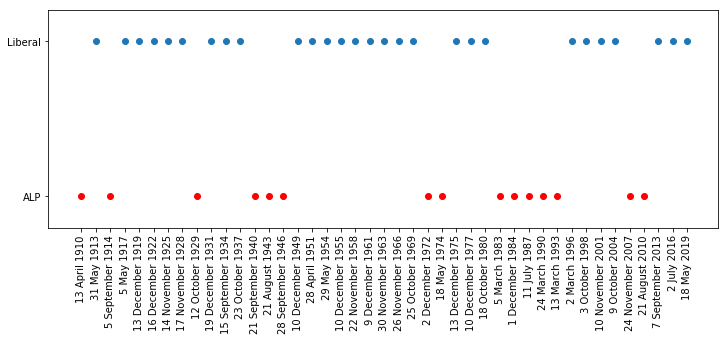

In [5]:
subresult = result.loc[3:,:]
plt.rcParams['figure.figsize']=[12,4]
plt.ylim(0.8,2.2)
plt.scatter(subresult.Date, subresult.Liberal) 
plt.scatter(subresult.Date, subresult.ALP, color='red')
plt.xticks(rotation=90)
plt.yticks([1,2], ['ALP', 'Liberal'])
plt.rcParams['figure.figsize']=[12,9]

## 2016 Results
So this section demonstrates the 2016 Federal Election Results across the country. Specifically, it does the distribution of seats won by each party. 

In [6]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12,9]

In [7]:
E2016 = pd.read_csv('E2016.csv', header=0)

In [8]:
E2016.head(5)

Unnamed: 0 StateAb  DivisionID DivisionNm  CountNumber  BallotPosition  \
0           0     ACT         101   Canberra            0               1   
1           1     ACT         101   Canberra            0               1   
2           2     ACT         101   Canberra            0               1   
3           3     ACT         101   Canberra            0               1   
4           4     ACT         101   Canberra            0               2   

   CandidateID    Surname   GivenNm PartyAb                 PartyNm Elected  \
0        28189  BRODTMANN       Gai     ALP  Australian Labor Party       Y   
1        28189  BRODTMANN       Gai     ALP  Australian Labor Party       Y   
2        28189  BRODTMANN       Gai     ALP  Australian Labor Party       Y   
3        28189  BRODTMANN       Gai     ALP  Australian Labor Party       Y   
4        28336     CAHILL  Patricia     GRN              The Greens       N   

  HistoricElected     CalculationType  CalculationValue     ycoord      xcoord  
0               Y    Preference Count           55091.0 -35.287931  149.193184  
1               Y  Preference Percent              42.8 -35.287931  149.193184  
2               Y      Transfer Count               0.0 -35.287931  149.193184  
3               Y    Transfer Percent               0.0 -35.287931  149.193184  
4               N    Preference Count           19200.0 -35.287931  149.193184

The following shows case the ability to construct a function in [Python](http://www.python.org). The advantage of a function is that one can recycle the code to repeat the same task for different inputs. In this case, it generates the plot of seat distributions depends on the party we wish to look at. 

In [12]:
def create_map(database, partynm):
    loc_aus = [-25.9505, 134.8605]
    mapAus = fol.Map(location=loc_aus,zoom_start=5)
    if partynm != 'Coalition':
        success = database.groupby(['CountNumber','Elected','CalculationType','PartyAb']).get_group((0,'Y','Preference Count', partynm)).loc[:,['ycoord', 'xcoord']].dropna().values
    else:
        coalition_list = ['LP', 'NP', 'LNP', 'CLP']
        for i,p in enumerate(coalition_list):
            if i==0:
                temp = database.groupby(['CountNumber','Elected','CalculationType','PartyAb']).get_group((0,'Y','Preference Count', p)).loc[:,['ycoord', 'xcoord']].dropna().values
            else:
                if 'Y' in set(database.loc[database.PartyAb==p,'Elected']):
                    temp = np.r_[temp, database.groupby(['CountNumber','Elected','CalculationType','PartyAb']).get_group((0,'Y','Preference Count', p)).loc[:,['ycoord', 'xcoord']].dropna().values]
        success = temp
    folp.MarkerCluster(locations=success).add_to(mapAus)
    return mapAus

In [13]:
ALP2016 = create_map(E2016,'ALP')
LP2016 = create_map(E2016, 'LP')
CoalE2016 = create_map(E2016, 'Coalition')

In [14]:
ALP2016

In [15]:
CoalE2016